In [1]:
import numpy as np
import torch
from torch.autograd import Variable
import torch.nn as nn
import math
from scipy import special

In [2]:
"""
Matlab code in python

"""

'\nMatlab code in python\n\n'

In [3]:
def funU(x,y):
    beta = 1/10
    a = np.array([-1,-1,-6.5,0.7])
    b = np.array([0,0,11,0.6])
    c = np.array([-10,-10,-6.5,0.7])
    D = np.array([-200,-100,-170,15])
    X = np.array([1,0,-0.5,-1])
    Y = np.array([0,0.5,1.5,1])
    gamma = 9
    k = 5
  
    fx1 = D[0]*np.exp(a[0]*((x-X[0])**2) + b[0]*(x-X[0])*(y-Y[0]) + c[0]*(y**2))
    fx2 = D[1]*np.exp(a[1]*((x-X[1])**2) + b[1]*(x-X[1])*(y-Y[1]) + c[1]*((y-Y[1])**2))
    fx3 = D[2]*np.exp(a[2]*((x-X[2])**2) + b[2]*(x-X[2])*(y-Y[2]) + c[2]*((y-Y[2])**2))
    fx4 = D[3]*np.exp(a[3]*((x-X[3])**2) + b[3]*(x-X[3])*(y-Y[3]) + c[3]*((y-Y[3])**2))
    extra = gamma*np.sin(2*k*math.pi*x)*np.sin(2*k*math.pi*y)
    
    U = fx1+fx2+fx3+fx4
#     U = U+extra
    U = np.exp(-beta*U)
    
    return U

In [4]:
beta = 1/10
xmin = -1.5
xmax = 1
ymin = -0.5
ymax = 2


In [5]:
n = 109 # the number of Chebyshev nodes
i = np.array(range(n-1,-1,-1))
t = math.pi*(0.5+i)/n
z = np.cos(t)
# % Chebyshev grid shifted to [xmin,xmax]*[ymin,ymax]
xt,yt = np.meshgrid(0.5*(xmin+xmax + z*(xmax-xmin)),0.5*(ymax+ymin+z*(ymax-ymin)))
f = funU(xt,yt)
cosktj = np.cos(np.array(range(n))[:,None]*t)
coefx = np.zeros((n,n))
# % interpolate f along each grid line y = const
print(cosktj.shape)

for r in range(n):
    if r == 0:
        fp = f[r,:][:,None]
        coefx[r,:] = 2*(cosktj@fp).T/n
    else:
        fp = f[r,:][:,None]
        coefx[r,:] = 2*(cosktj@fp).T/n
                    
# % interpolate each coefficient coefx(:,j) by a Cheb sum
coefxy = np.zeros((n,n))
for r in range(n):
    if r == 0:
        coefxy[r,:] = 2*cosktj[r,:]@coefx/n
    else:
        coefxy[r,:] = 2*cosktj[r,:]@coefx/n
# print(coefxy)
# % column k of coefxy are Cheb coefs for coefx(:,k)

(109, 109)


In [6]:
coefxy[0,:] = 0.5*coefxy[0,:]
coefxy[:,0] = 0.5*coefxy[:,0]

In [7]:
# We deal with approximation of function and compare the difference
x = np.linspace(-1,1,101)
# x = 0.5*np.ones(41)
y = np.linspace(-1,1,101)

xg = 0.5*(xmin+xmax+x*(xmax-xmin));
yg = 0.5*(ymin+ymax+y*(ymax-ymin));

xx,yy = np.meshgrid(x,y)
xx = xx.ravel()
yy = yy.ravel()

XX,YY = np.meshgrid(xg,yg)
XX = XX.ravel()
YY = YY.ravel()


In [8]:
newx = (2*xg - (xmin + xmax))/(xmax - xmin)
A = np.array([0.623,0.028])

In [9]:
def calc_pol(max_pol_deg):
    pol = []
    pol_deg = max_pol_deg+1
    coef = [1]
    for deg in range(pol_deg):
        p_deg = np.polynomial.chebyshev.Chebyshev(coef)
        pol.append(p_deg)
        coef.insert(0, 0)
    
    return pol

In [10]:
# A = calc_pol(19)

In [11]:
def all_pol(max_pol_deg_vec,d,beta,a = -1,b = 1):
    all_pol_M = []
    for i in range(d):
        max_pol_deg = max_pol_deg_vec[i]
        pol = calc_pol(max_pol_deg)
        
        all_pol_M.append(pol)
        
    return all_pol_M

In [25]:
chebys_x = calc_pol(n-1)
chebys_y = calc_pol(n-1)

# print(XX.shape)
# print(chebys_x[1](XX).shape)

(10201,)


In [13]:
estimate = 0
coefxy = coefxy.T
for j in range(n):
    for k in range(n):
        estimate += coefxy[k,j]*chebys_x[k](xx)*chebys_y[j](yy)

In [14]:
actual = funU(XX,YY)
Diff = np.abs(actual - estimate)
RMSE = np.sqrt(np.mean(np.square(Diff)))
print(RMSE)

0.049996595152422135


In [15]:
rel_error = RMSE/np.sqrt(np.mean(np.square(actual)))
print(rel_error)

3.398921179934976e-07


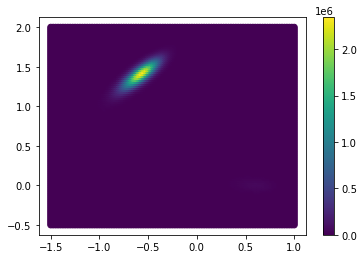

In [16]:
import matplotlib.pyplot as plt
plt.scatter(XX,YY,c = actual)
plt.colorbar()

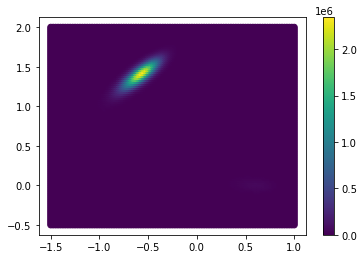

In [17]:
plt.scatter(XX,YY,c = estimate)
plt.colorbar()

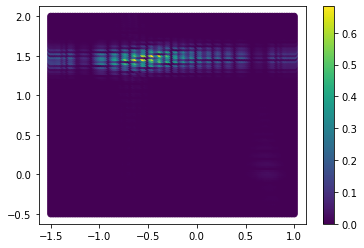

In [18]:
plt.scatter(XX,YY,c = Diff)
plt.colorbar()
# plt.clim(0, 150) 
plt.show()

In [19]:
Testx = np.linspace(-0.5,1,101)
Testy = np.linspace(0.5,2,101)
Tx,Ty = np.meshgrid(Testx,Testy)
Tx = Tx.ravel()
Ty = Ty.ravel()

TestX = (2*Testx - (xmin + xmax))/(xmax - xmin)
TestY = (2*Testy - (ymin + ymax))/(ymax - ymin)
TX,TY = np.meshgrid(TestX,TestY)
TX = TX.ravel()
TY = TY.ravel()


new_estimate = 0
for j in range(n):
    for k in range(n):
        new_estimate += coefxy[k,j]*chebys_x[k](TX)*chebys_y[j](TY)
new_actual = funU(Tx,Ty)

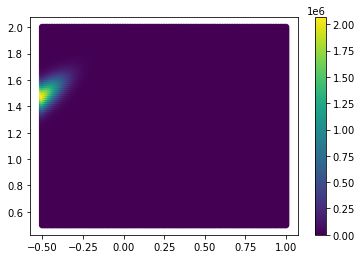

In [20]:
plt.scatter(Tx,Ty,c = new_actual)
plt.colorbar()

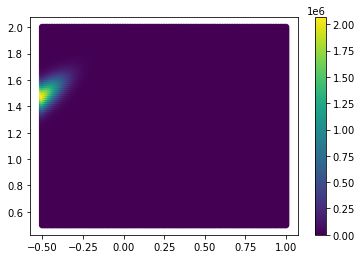

In [21]:
plt.scatter(Tx,Ty,c = new_estimate)
plt.colorbar()

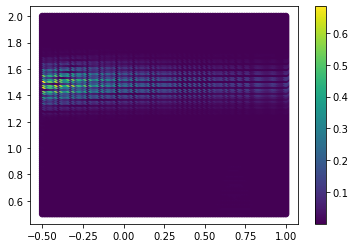

In [22]:
plt.scatter(Tx,Ty,c = np.abs(new_actual - new_estimate))
plt.colorbar()

(-0.5, 2.0)

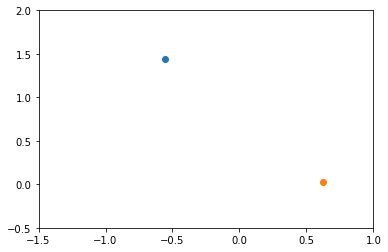

In [23]:
set_A = np.array([-0.558,1.441])
set_B = np.array([0.623,0.028])
a1 = -1.5
a2 = 1
b1 = -0.5
b2 = 2
plt.scatter(set_A[0],set_A[1])
plt.scatter(set_B[0],set_B[1])
plt.xlim([a1,a2])
plt.ylim([b1,b2])



(-1.0, 1.0)

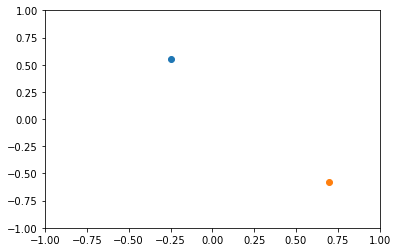

In [24]:
def trans_into_standard_int(a1,a2,b1,b2,pts):
    pts[0] = (2*pts[0] - (a1 + a2))/(a2 - a1)
    pts[1] = (2*pts[1] - (b1 + b2))/(b2 - b1)
    return pts

new_set_A = trans_into_standard_int(a1,a2,b1,b2,set_A)
new_set_B = trans_into_standard_int(a1,a2,b1,b2,set_B)
plt.scatter(new_set_A[0],new_set_A[1])
plt.scatter(new_set_B[0],new_set_B[1])
plt.xlim([-1,1])
plt.ylim([-1,1])